#  Sonkhe Shongwe
## **Project Name:** Car Price Prediction (Used Cars)

### Task 3 at Oasis Infobyte as Data Science Intern



<img src="Used_Cars.jpg" alt="Used Cars" width="70%" height="440"/>


# Introduction

**Project Overview:**
- In the world of buying and selling used cars, accurately predicting the selling price is incredibly valuable. This project is like a journey, starting with gathering data and ending with predicting a car's value. It's akin to a skilled mechanic fine-tuning an engine, tweaking algorithms until we turn numbers into useful insights. My aim? To help sellers and buyers make informed decisions in the complex world of car pricing.  
<!-- Add two spaces at the end of this line -->

**Project Objectives:**

1. **Explore Car Features:** Navigate through vast datasets to extract valuable insights about car features and their impact on pricing.

2. **Model Development:** Develop predictive models that can forecast the selling price of cars with remarkable accuracy.

3. **Pattern Recognition:** Uncover patterns and trends within the data to empower buyers and sellers with knowledge to make informed decisions.

4. **Visual Storytelling:** Create visualizations that paint a vivid picture of the automotive landscape, revealing the intricate relationships between car attributes and market dynamics


## Table of Contents

- [1. Importing Packages](#one)
- [2. Loading Data](#two)
- [3. Dataset Overview](#three)
- [4. Data Preprocessing](#four)
- [5. Exploratory Data Analysis (EDA)](#five)
- [6. Feature Selection](#six)
- [7. Model Building](#seven)
- [8. Model Evaluation](#eight)
- [9. Best Model - Selection](#nine)
- [10. Conclusion](#ten)


<a id="one"></a>
# 1. Importing Packages 📦
[Back to Table of Contents](#cont)

---

🌟 **Description: Importing Packages** 🌟

The foundation of our analysis begins with importing the following Python packages:

In [2]:
# Import necessary libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import kurtosis

# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for machine learning tasks
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Set the background style
sns.set(style="darkgrid")


<a id="two"></a>
# 2. Loading Data 💾
[Back to Table of Contents](#cont)

---

🌟 **Description: Loading Data** 🌟

Dataset Details:

- **Year:** Represents the year of manufacture of the car.
- **Selling_Price:** Indicates the selling price of the car.
- **Present_Price:** Refers to the current price of the car.
- **Driven_kms:** Represents the distance driven by the car.
- **Fuel_Type:** Categorical variable indicating the type of fuel used (e.g., Petrol, Diesel).
- **Selling_type:** Categorical variable indicating the type of selling (e.g., Dealer, Individual).
- **Transmission:** Categorical variable indicating the transmission type of the car (e.g., Manual, Automatic).
Owner: Represents the number of previous owners of the car.

In [4]:
# Load the dataset
df_cars = pd.read_csv('car data.csv')

<a id="three"></a>

# 3. Dataset Overview 📋
[Back to Table of Contents](#cont)

---

🌟 **Description: Dataset Overview** 🌟

This section provides an overview of the dataset, including its structure, key statistics, and any relevant information necessary for understanding the data. It serves as a starting point for exploring the dataset and gaining insights into its contents.



In [5]:
df_cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df_cars.shape

(301, 9)

-  `Car` data has **301** rows & **9** columns

In [7]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### Analysis of `df_cars` DataFrame:

**Categorical Columns:**

- `Car_Name`: Object (string) type.
- `Fuel_Type`: Object (string) type.
- `Selling_type`: Object (string) type.
- `Transmission`: Object (string) type.

**Numerical Columns:**

- `Year`: Int64 type.
- `Selling_Price`: Float64 type.
- `Present_Price`: Float64 type.
- `Driven_kms`: Int64 type.
- `Owner`: Int64 type.

**Null Data:**
- There are no missing values in any of the columns (`Non-Null Count` is the same as the total number of entries).


In [8]:
df_cars.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

- `Cars` dataframe **ZERO** null values.

In [9]:
# Check for duplicate rows
duplicate_rows = df_cars[df_cars.duplicated()]

# Display duplicate rows if any
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")


Duplicate rows found:
    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
17    ertiga  2016           7.75          10.79       43000    Diesel   
93  fortuner  2015          23.00          30.61       40000    Diesel   

   Selling_type Transmission  Owner  
17       Dealer       Manual      0  
93       Dealer    Automatic      0  


In [10]:
# Drop duplicate rows in df_cars DataFrame
df_cars.drop_duplicates(inplace=True)

# Print the shape of the cleaned DataFrame
print("Shape of cleaned DataFrame:", df_cars.shape)

Shape of cleaned DataFrame: (299, 9)


<a id="four"></a>
# 4. Data Preprocessing 🛠️
[Back to Table of Contents](#cont)

---

🌟 **Description: Data Preprocessing** 🌟

In the data preprocessing phase, we will undertake the following tasks:

1. **Encoding Categorical Variables:** Transform categorical variables into numerical representations to facilitate machine learning algorithms' understanding.
2. **Outlier Detection (Kurtosis):** Identify potential outliers by assessing the tailedness of key features' distributions using kurtosis.

These preprocessing steps lay the groundwork for subsequent stages in the machine learning pipeline, contributing to the development of accurate and reliable predictive models.

## 4.1 Encoding

- **Fuel_Type**: Encoded categories include Petrol, Diesel, and CNG.
- **Seller Type**: Encoded categories include Dealer and Individual.
- **Transmission**: Encoded categories include Manual and Automatic.


In [11]:
# Create a mapping dictionary for each categorical variable
fuel_type_mapping = {'Petrol': 0, 'Diesel': 1, 'CNG': 2}
selling_type_mapping = {'Dealer': 0, 'Individual': 1}
transmission_mapping = {'Manual': 0, 'Automatic': 1}

# Replace categorical values with their corresponding encoded values using the mapping dictionary
df_cars.replace({'Fuel_Type': fuel_type_mapping, 'Selling_type': selling_type_mapping, 'Transmission': transmission_mapping}, inplace=True)

# Display the first few rows of the DataFrame with encoded variables
df_cars.head()


C:\Users\sonkh\AppData\Local\Temp\ipykernel_10492\3954667702.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cars.replace({'Fuel_Type': fuel_type_mapping, 'Selling_type': selling_type_mapping, 'Transmission': transmission_mapping}, inplace=True)


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [12]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    int64  
 6   Selling_type   299 non-null    int64  
 7   Transmission   299 non-null    int64  
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 23.4+ KB


## 4.2 Outlier Check (Kurtosis)

- *Kurtosis* is a statistical measure that quantifies the "tailedness" or the shape of the distribution of a dataset. It provides information about the presence of outliers in the tails of the distribution compared to a normal distribution.

- High kurtosis (**>3**) indicates a large number of outliers and low kurtosis (**<3**) a lack of outliers.


In [13]:
# Calculate kurtosis for Selling_Price
selling_price_kurtosis = kurtosis(df_cars['Selling_Price'])

# Calculate kurtosis for Present_Price
present_price_kurtosis = kurtosis(df_cars['Present_Price'])

# Calculate kurtosis for Driven_kms
driven_kms_kurtosis = kurtosis(df_cars['Driven_kms'])

print("Kurtosis for Selling_Price:", selling_price_kurtosis)
print("Kurtosis for Present_Price:", present_price_kurtosis)
print("Kurtosis for Driven_kms:", driven_kms_kurtosis)


Kurtosis for Selling_Price: 9.304265500002908
Kurtosis for Present_Price: 32.64839043977305
Kurtosis for Driven_kms: 66.97643932118137


**`Selling_Price` Kurtosis (9.304):**
- Distribution is heavy-tailed with a sharp peak, indicating numerous outliers at higher selling prices.

**`Present_Price` Kurtosis (32.648):**
- Distribution has an even heavier tail and sharper peak compared to selling price, suggesting a significant number of outliers at higher present prices.

**`Driven_kms` Kurtosis (66.976):**
- Distribution exhibits an extreme heavy tail and very sharp peak, indicating an exceptionally large number of outliers at higher driven kilometers.

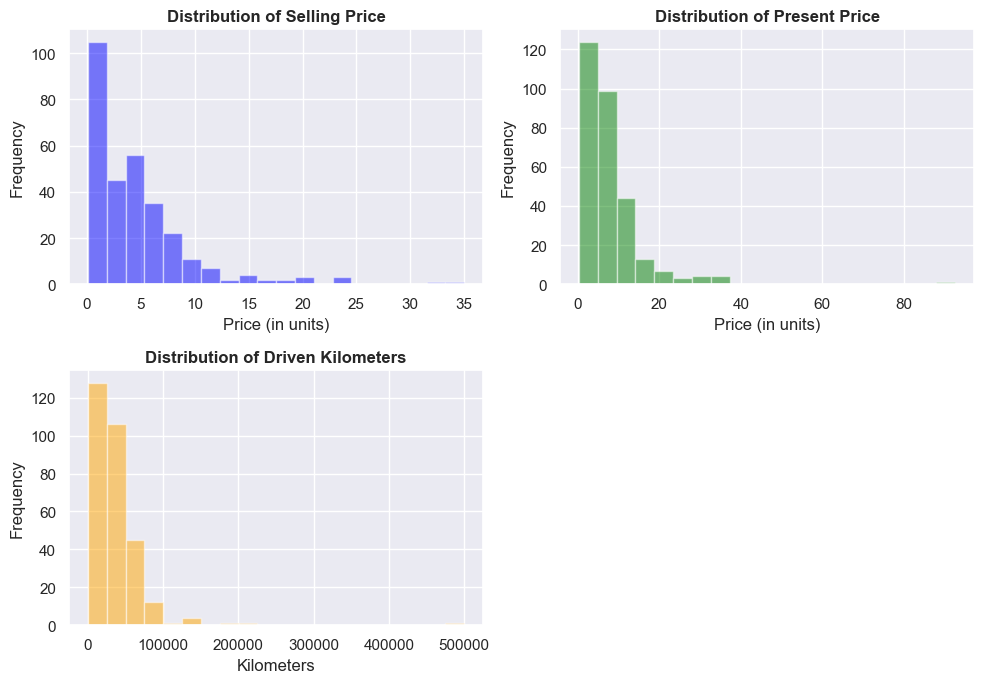

In [14]:
# Create a figure object with subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 7), gridspec_kw={'height_ratios': [1, 1]})

# Plot histogram for Selling_Price
axs[0, 0].hist(df_cars['Selling_Price'], bins=20, alpha=0.5, color='blue')
axs[0, 0].set_title('Distribution of Selling Price', fontweight='bold')  # Set title font weight to bold
axs[0, 0].set_xlabel('Price (in units)')
axs[0, 0].set_ylabel('Frequency')

# Plot histogram for Present_Price
axs[0, 1].hist(df_cars['Present_Price'], bins=20, alpha=0.5, color='green')
axs[0, 1].set_title('Distribution of Present Price', fontweight='bold')  # Set title font weight to bold
axs[0, 1].set_xlabel('Price (in units)')
axs[0, 1].set_ylabel('Frequency')

# Plot histogram for Driven_kms
axs[1, 0].hist(df_cars['Driven_kms'], bins=20, alpha=0.5, color='orange')
axs[1, 0].set_title('Distribution of Driven Kilometers', fontweight='bold')  # Set title font weight to bold
axs[1, 0].set_xlabel('Kilometers')
axs[1, 0].set_ylabel('Frequency')

# Hide the last subplot
axs[1, 1].axis('off')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


- The concentration of data towards the lower end of the price and driven kilometers suggests that the dataset consists mainly of lower-priced and less-driven cars.
- The high kurtosis values indicate a need for further data processing if a normal distribution is assumed for these variables in predictive modeling.

<a id="five"></a>
# 5. Exploratory Data Analysis (EDA) 🔍
[Back to Table of Contents](#cont)

---

🌟 **Description: Exploratory Data Analysis (EDA)** 🌟

- **Exploratory Data Analysis** (EDA) is a critical phase in the data analysis process, where we explore and analyze the dataset to gain insights and understand its underlying structure. During EDA, we perform various statistical and visual techniques to uncover patterns, trends, anomalies, and relationships within the data.



## 5.1 Distribution of Target Variable (Selling Price)

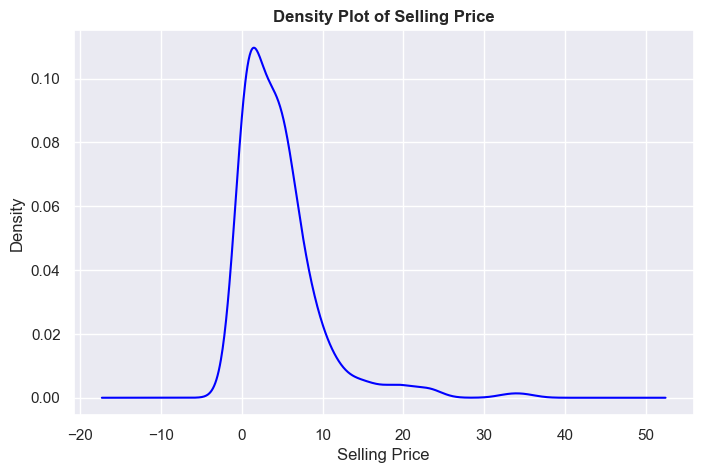

In [15]:
# Create a new figure for the plot
plt.figure(figsize=(8, 5))

# Density Plot of Selling Price
df_cars['Selling_Price'].plot(kind='density', color='Blue')
plt.title('Density Plot of Selling Price', fontweight = 'bold')
plt.xlabel('Selling Price')
plt.ylabel('Density')

# Show plot
plt.show()


- **Distribution Shape:** The density plot of the Selling Price is sharply peaked and right-skewed, indicating that most cars are clustered around a lower selling price point with a tail extending towards the higher prices.

- **Density Plot Interpretation:** The peak of the density plot indicates the mode of the selling prices, which is the most common price range where the cars are sold.

## 5.2 Average Selling Price per year

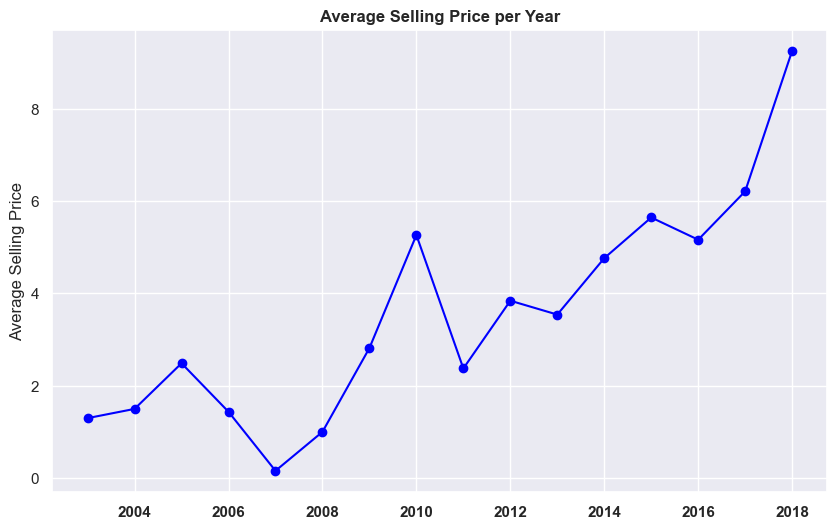

In [16]:
# Grouping the data by year and calculating the average selling price
average_selling_price_per_year = df_cars.groupby('Year')['Selling_Price'].mean().reset_index()

# Plotting the average selling price per year
plt.figure(figsize=(10, 6))
plt.plot(average_selling_price_per_year['Year'], average_selling_price_per_year['Selling_Price'], marker='o', color='blue')
plt.title('Average Selling Price per Year', fontweight='bold')
plt.ylabel('Average Selling Price')
plt.grid(True)  # Add grid lines for better visualization
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Make x-axis points bold
plt.xticks(fontweight='bold')

# Show plot
plt.show()


- **Trend Over Time:** The line graph indicates an upward trend in average selling prices of cars over the years, with noticeable fluctuations. The overall trend suggests that the average selling price is higher for more recent car models.
- **Data Considerations for Predictive Modeling:** The variability in average selling price per year should be considered when building a predictive model, as the year of the car could be a significant predictor of its selling price.


## 5.3 Average Selling Price for Different Fuel Types

In [17]:
# Create a copy of the DataFrame
df_cars_copy = df_cars.copy()

# Reverse the encoding for Fuel_Type column
reverse_fuel_type_mapping = {v: k for k, v in fuel_type_mapping.items()}
df_cars_copy['Fuel_Type'] = df_cars_copy['Fuel_Type'].map(reverse_fuel_type_mapping)

In [18]:
# Calculate average selling price for different fuel types
average_selling_price = df_cars_copy.groupby('Fuel_Type')['Selling_Price'].mean().reset_index()

In [19]:
average_selling_price

,Fuel_Type,Selling_Price
0,CNG,3.100000
1,Diesel,10.102759
2,Petrol,3.264184


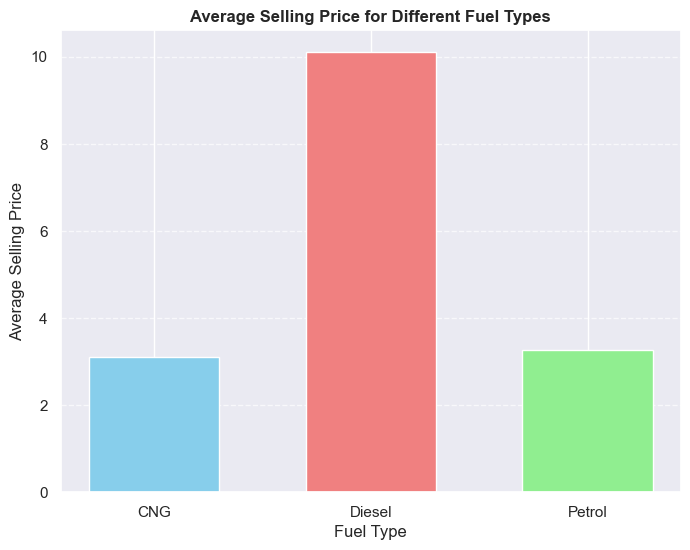

In [20]:
# Define colors for each fuel type
colors = ['skyblue', 'lightcoral', 'lightgreen']

# Plotting the average selling price for different fuel types
plt.figure(figsize=(8, 6))
plt.bar(average_selling_price['Fuel_Type'], average_selling_price['Selling_Price'], color=colors, width=0.6)
plt.title('Average Selling Price for Different Fuel Types', fontweight = 'bold')
plt.xlabel('Fuel Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add dashed grid lines on the y-axis

# Show plot
plt.show()


- **Impact of Fuel Type on Selling Price:** The bar chart shows that diesel cars have the highest average selling price compared to CNG and petrol cars, suggesting that diesel cars might be perceived as more valuable in the resale market or are originally more expensive.

- **Variance in Selling Price:** There's a significant difference in the average selling price among different fuel types, indicating that fuel type is a strong factor in determining a car's selling price.

- **Preference for Diesel Vehicles:** The higher average selling price for diesel cars may reflect a market preference for diesel engines, possibly due to better fuel efficiency or longer engine life, leading to higher resale values.


## 5.4 Average driven KMS per transmission

In [21]:
# Create a copy of the DataFrame
df_cars_transmission = df_cars.copy()

# Reverse the encoding for Transmission column
reverse_transmission_mapping = {v: k for k, v in transmission_mapping.items()}
df_cars_transmission['Transmission'] = df_cars_transmission['Transmission'].map(reverse_transmission_mapping)

# Grouping the data by transmission type and calculating the average driven kilometers
average_driven_kms_per_transmission = df_cars_transmission.groupby('Transmission')['Driven_kms'].mean().reset_index()

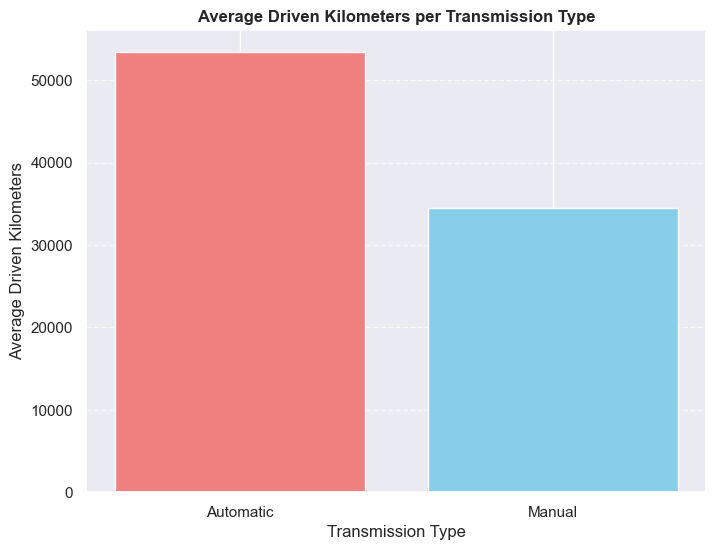

In [22]:
# Define colors for each transmission type
colors = ['lightcoral', 'skyblue']

# Plotting the average driven kilometers per transmission
plt.figure(figsize=(8, 6))
plt.bar(average_driven_kms_per_transmission['Transmission'], average_driven_kms_per_transmission['Driven_kms'], color=colors)
plt.title('Average Driven Kilometers per Transmission Type', fontweight = 'bold')
plt.xlabel('Transmission Type')
plt.ylabel('Average Driven Kilometers')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add dashed grid lines on the y-axis
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Show plot
plt.show()


 - **Mileage vs. Transmission Type:** The bar chart suggests that on average, automatic cars are driven more kilometers than manual cars, which might be indicative of the driving preferences or the usage patterns of automatic car owners.
 - **Potential Driver Behavior:** Owners of automatic cars may tend to use their vehicles more extensively, potentially due to the convenience and ease of driving an automatic transmission, especially in urban settings with frequent stop-and-go traffic.

## 5.5 Average Selling Price per Selling Type

In [23]:
# Create a copy of the DataFrame
df_cars_selling_type = df_cars.copy()

# Reverse the encoding for Selling_type column
reverse_selling_type_mapping = {v: k for k, v in selling_type_mapping.items()}
df_cars_selling_type['Selling_type'] = df_cars_selling_type['Selling_type'].map(reverse_selling_type_mapping)

# Grouping the data by selling type and calculating the average selling price
average_selling_price_per_type = df_cars_selling_type.groupby('Selling_type')['Selling_Price'].mean().reset_index()

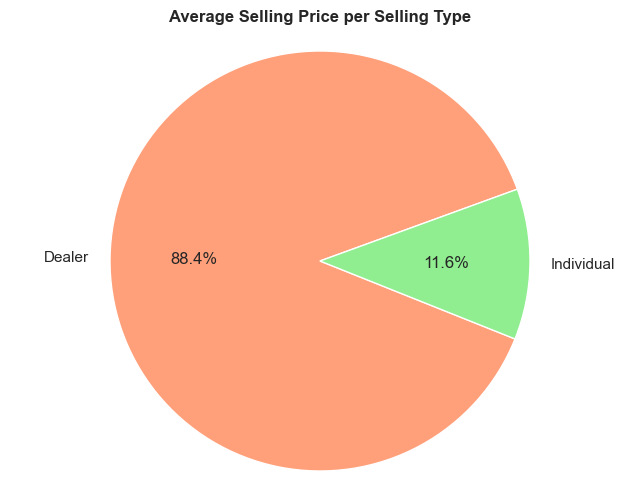

In [24]:
# Plotting the average selling price per selling type as a pie chart with custom rotation
plt.figure(figsize=(8, 6))
plt.pie(average_selling_price_per_type['Selling_Price'], labels=average_selling_price_per_type['Selling_type'], colors=['LightSalmon', 'LightGreen'], autopct='%1.1f%%', startangle=20)
plt.title('Average Selling Price per Selling Type', fontweight = 'bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.show()


- **Dominance of Dealers in Sales:** The pie chart clearly shows that a significant majority (88.4%) of the average selling price is associated with cars sold by dealers, suggesting that dealer sales dominate the market in terms of value.

- **Individual Sales Contribution:** Only a small portion (11.6%) of the average selling price comes from cars sold individually. This could indicate that individuals tend to sell cars at a lower price point compared to dealers or that individual sales are less frequent.


## 5.6 Selling Price vs Other Variables

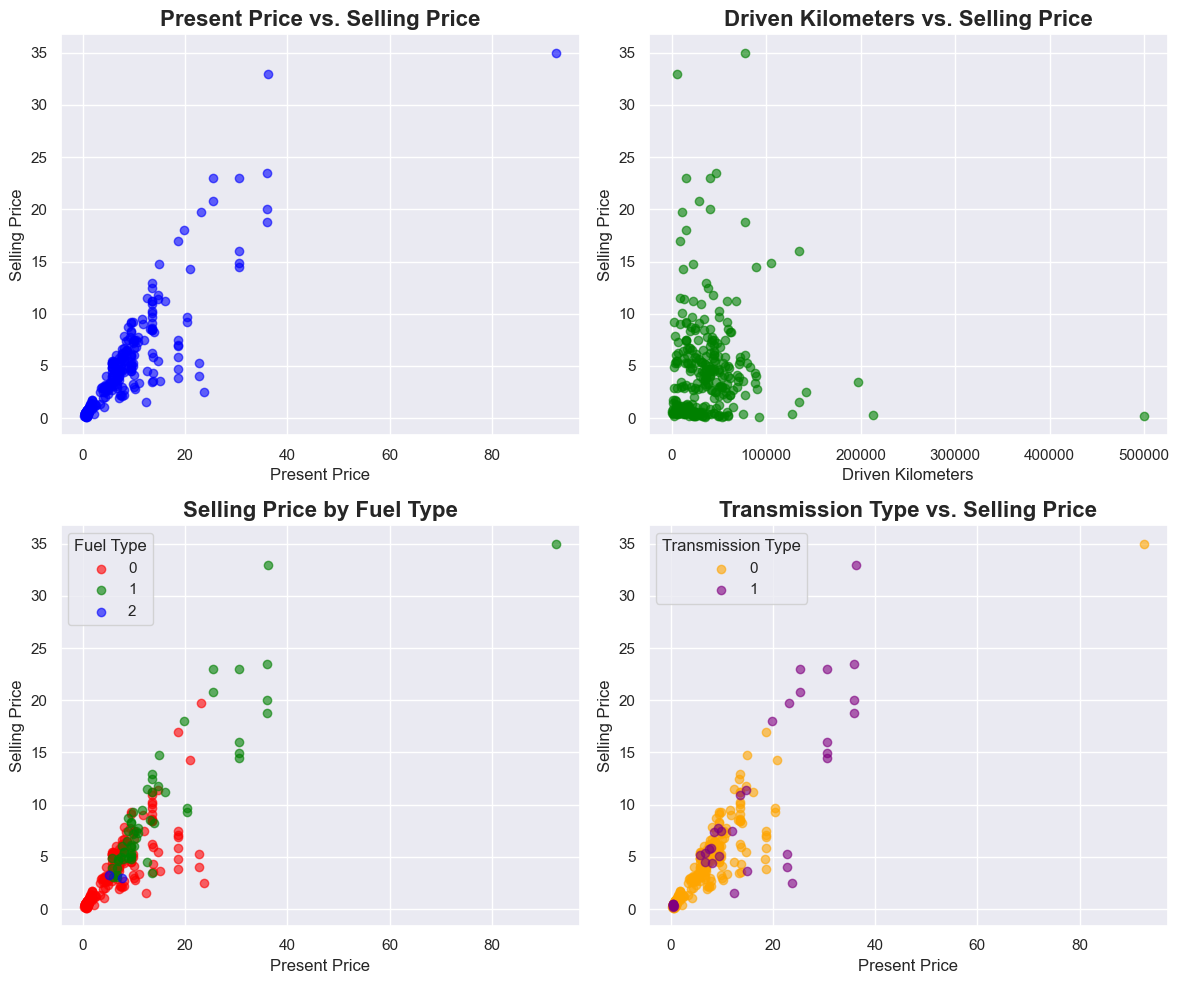

In [26]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Present Price vs. Selling Price
axs[0, 0].scatter(df_cars['Present_Price'], df_cars['Selling_Price'], color='blue', alpha=0.6)
axs[0, 0].set_title('Present Price vs. Selling Price', fontweight='bold', fontsize=16)  # Increase font size
axs[0, 0].set_xlabel('Present Price')
axs[0, 0].set_ylabel('Selling Price')
axs[0, 0].grid(True)

# Driven Kms vs. Selling Price
axs[0, 1].scatter(df_cars['Driven_kms'], df_cars['Selling_Price'], color='green', alpha=0.6)
axs[0, 1].set_title('Driven Kilometers vs. Selling Price', fontweight='bold', fontsize=16)  # Increase font size
axs[0, 1].set_xlabel('Driven Kilometers')
axs[0, 1].set_ylabel('Selling Price')
axs[0, 1].grid(True)

# Selling Price by Fuel Type
colors = ['red', 'green', 'blue']
for fuel_type, color in zip(df_cars['Fuel_Type'].unique(), colors):
    subset = df_cars[df_cars['Fuel_Type'] == fuel_type]
    axs[1, 0].scatter(subset['Present_Price'], subset['Selling_Price'], color=color, alpha=0.6, label=fuel_type)
axs[1, 0].set_title('Selling Price by Fuel Type', fontweight='bold', fontsize=16)  # Increase font size
axs[1, 0].set_xlabel('Present Price')
axs[1, 0].set_ylabel('Selling Price')
axs[1, 0].legend(title='Fuel Type')
axs[1, 0].grid(True)

# Transmission Type vs. Selling Price
colors = ['orange', 'purple']
for transmission_type, color in zip(df_cars['Transmission'].unique(), colors):
    subset = df_cars[df_cars['Transmission'] == transmission_type]
    axs[1, 1].scatter(subset['Present_Price'], subset['Selling_Price'], color=color, alpha=0.6, label=transmission_type)
axs[1, 1].set_title('Transmission Type vs. Selling Price', fontweight='bold', fontsize=16)  # Increase font size
axs[1, 1].set_xlabel('Present Price')
axs[1, 1].set_ylabel('Selling Price')
axs[1, 1].legend(title='Transmission Type')
axs[1, 1].grid(True)

# Tight layout
plt.tight_layout()

# Show plot
plt.show()


- **Present Price vs. Selling Price:** The scatter plot shows a positive correlation between present price and selling price; as the present price increases, the selling price tends to increase as well.

- **Driven Kilometers vs. Selling Price:** This plot suggests an inverse relationship between the number of kilometers driven and the selling price; cars with higher mileage generally have lower selling prices.

- **Selling Price by Fuel Type:** Diesel cars (in green) appear to have higher selling prices across various present prices, compared to petrol (in blue) and CNG cars (in red), indicating that diesel cars may retain their value better.

- **Transmission Type vs. Selling Price:** Automatic cars (in orange) show a higher range of selling prices at different present prices than manual cars (in purple), suggesting that automatic cars can command higher prices upon resale.

# 6. Feature Selection 🔍
[Back to Table of Contents](#cont)

---

🌟 **Description: Feature Selection** 🌟

- This section focuses on identifying which features have the strongest correlation with the selling price of cars. We begin by calculating the Pearson correlation coefficients to measure the linear relationship between numerical features and the target variable.
- A heatmap visualization is then created to highlight these correlations. Subsequently, irrelevant columns such as `Car_Name` and `Selling_Price` are removed before splitting the data into training and testing sets for further analysis.


## 6.1 Correlation Analysis (Pearson)
Pearson correlation measures the linear relationship between two continuous variables. It quantifies the degree to which pairs of variables change together, ranging from **-1** to **1**, where:

- **1** indicates a perfect *positive linear* relationship,
- **0** indicates *no linear* relationship, and
- **-1** indicates a perfect *negative linear* relationship.

In [27]:
# Calculating Pearson correlation coefficients
correlation_matrix = df_cars.corr(numeric_only =True)

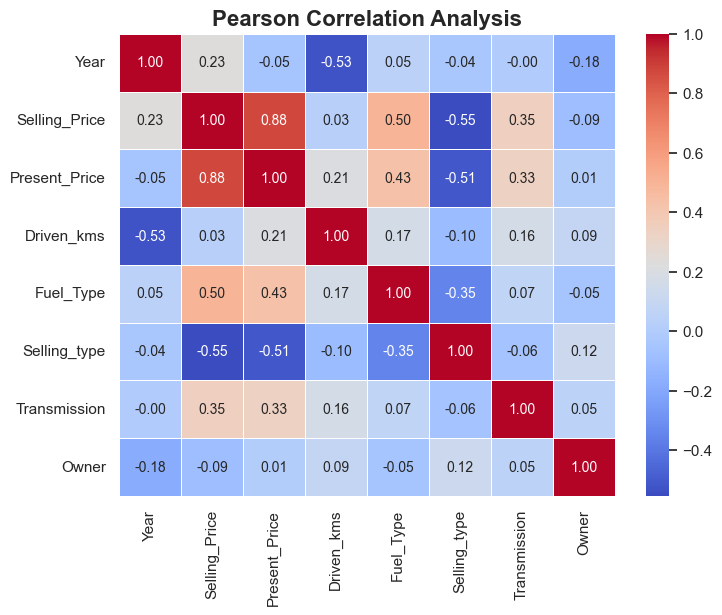

In [28]:
# Plotting the correlation matrix as a heatmap with spacing between boxes
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, linewidths=0.5)
plt.title('Pearson Correlation Analysis', fontweight = 'bold',fontsize =16)

# Show plot
plt.show()

- **Strong Positive Correlation Between Selling and Present Price:** A robust positive correlation (0.88) indicates that as the present price of a car rises, its selling price tends to increase as well. This suggests a direct relationship between market value and resale value.

- **Negative Correlation Between Year and Driven Kilometers:** Notable negative correlation (-0.53) reveals that newer cars (with higher year numbers) typically have fewer driven kilometers. This aligns with the expectation that newer cars would have been used for a shorter period.

- **Moderate Positive Correlation Between Selling Price and Fuel Type:** The correlation coefficient (0.50) suggests a moderate relationship between a car's fuel type and its selling price. This relationship's nature depends on how fuel types are numerically encoded.

- **Negative Correlation Between Selling Price and Transmission:** A moderate negative correlation (-0.55) indicates that one transmission type (likely manual, if encoded as 0) tends to have lower selling prices compared to the other.

These insights aid in feature selection for predictive modeling, emphasizing the importance of considering such relationships to enhance price prediction accuracy.


In [29]:
df_cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## 6.2 Outlier Removal (Present_Price)

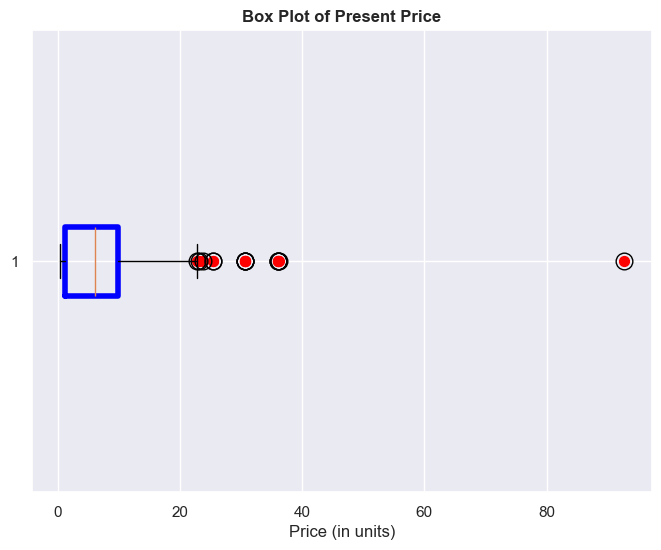

In [30]:
2# Assume 'df_cars' is your DataFrame and 'Present_Price' is the column of interest
plt.figure(figsize=(8, 6))

# Create the boxplot and capture the result in a variable
boxprops = dict(linestyle='-', linewidth=4, color='blue')
flierprops = dict(marker='o', color='green', markersize=12)  # default properties for all outliers

# Create boxplot with custom flier (outlier) props
bp = plt.boxplot(df_cars['Present_Price'], vert=False, flierprops=flierprops, boxprops=boxprops)

# Get the outliers' x and y coordinates
outlier_x = bp['fliers'][0].get_data()[0]
outlier_y = bp['fliers'][0].get_data()[1]

# Set the color for each outlier individually
for x, y in zip(outlier_x, outlier_y):
    plt.scatter(x, y, color='red', s=50)  # s is the size of the marker

plt.title('Box Plot of Present Price',fontweight = 'bold')
plt.xlabel('Price (in units)')

# Show the plot
plt.show()

- Upon scrutinizing the box plot, it's evident that an outlier exists in the Present Price data, significantly higher than the rest of the values. This outlier has the potential to adversely affect the accuracy of our model's predictions.

In [31]:
# Find the maximum Present_Price
max_present_price = df_cars['Present_Price'].max()

print("Maximum Present_Price:", max_present_price)

Maximum Present_Price: 92.6


In [32]:
# Find the row where Present_Price is equal to max_present_price
max_present_price_row = df_cars[df_cars['Present_Price'] == max_present_price]

print("Row with Maximum Present_Price:")
max_present_price_row

Row with Maximum Present_Price:


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
86,land cruiser,2010,35.0,92.6,78000,1,0,0,0


In [33]:
# Find the index of the row where Present_Price is equal to max_present_price
max_present_price_index = df_cars[df_cars['Present_Price'] == max_present_price].index

# Drop the row using the index
df_cars.drop(index=max_present_price_index, inplace=True)

# Confirm that the row has been dropped
print("Row with maximum Present_Price has been dropped.")

Row with maximum Present_Price has been dropped.


In [34]:
df_cars.shape

(298, 9)

## 6.3 Splitting the Data

The dataset is split into training and testing sets using the `train_test_split` function from scikit-learn. The split is performed as follows:

- **Training Set (X_train, y_train):** 80% of the data is allocated for training the model.
- **Testing Set (X_test, y_test):** 20% of the data is reserved for evaluating the model's performance.

The split is stratified, preserving the proportion of target classes in both the training and testing sets. Additionally, the random state is set to 42 for reproducibility, ensuring that the same random split is generated each time the code is run.


In [35]:
# Dropping 'Car_Name' and 'Selling_Price' columns
X = df_cars.drop(['Car_Name', 'Selling_Price'], axis=1)
y = df_cars['Selling_Price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (238, 7)
Shape of X_test: (60, 7)
Shape of y_train: (238,)
Shape of y_test: (60,)


<a id="seven"></a>
# 7. Model Building 🏗️
[Back to Table of Contents](#cont)

---

🌟 **Description: Model Building** 🌟

In this section, we explore various machine learning models to predict car prices based on their features. The following models will be considered:

1. **Linear Regression**
2. **Extra Trees Regressor**
3. **Lasso Regression**
4. **Decision Trees**
5. **Random Forest**

We will train and evaluate each model to determine which one best captures the complex relationships within the car dataset and provides accurate predictions of car prices.



## 7.1 Linear Regression
- **Linear Regression:** A basic yet interpretable model that establishes a linear relationship between the input features and the target variable.

In [36]:
# Initialize the linear regression model
lm_model = LinearRegression()

# Train the model on the training data
lm_model.fit(X_train, y_train)

# Make predictions on the testing data
lm_y_pred = lm_model.predict(X_test)

# Calculate evaluation metrics
lm_mse = mean_squared_error(y_test, lm_y_pred)
lm_mae = mean_absolute_error(y_test, lm_y_pred)
lm_r2 = r2_score(y_test, lm_y_pred)
lm_rmse = np.sqrt(lm_mse)

print("Linear Regression Metrics:")
print("Root Mean Squared Error (RMSE):", lm_rmse)

Linear Regression Metrics:
Root Mean Squared Error (RMSE): 2.6080875719617436


In [37]:
# Create a dictionary to store actual and predicted values
lm_actual_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': lm_y_pred})

# Display the dictionary
lm_actual_predicted.head()

,Actual,Predicted
162,0.45,0.064633
267,8.35,7.533588
257,8.50,8.219652
9,7.45,6.606423
78,5.25,11.396125


## 7.2 Extra Trees Regressor
- **Extra Trees Regressor:** A powerful ensemble learning technique that combines the concepts of bagging and random feature selection to build a robust regression model.


In [38]:
# Initialize the Extra Trees Regression model
extra_trees_model = ExtraTreesRegressor(n_estimators=68, max_depth=10, random_state=42)  # You can adjust hyperparameters as needed

# Train the model on the training data
extra_trees_model.fit(X_train, y_train)

# Make predictions on the testing data
extra_trees_y_pred = extra_trees_model.predict(X_test)

# Calculate evaluation metrics
extra_trees_mse = mean_squared_error(y_test, extra_trees_y_pred)
extra_trees_mae = mean_absolute_error(y_test, extra_trees_y_pred)
extra_trees_r2 = r2_score(y_test, extra_trees_y_pred)
extra_trees_rmse = np.sqrt(extra_trees_mse)

print("Extra Trees Regression Metrics:")
print("Root Mean Squared Error (RMSE):", extra_trees_rmse)

Extra Trees Regression Metrics:
Root Mean Squared Error (RMSE): 1.6015844999408135


In [39]:
# Create a DataFrame for actual and predicted values
extra_trees_actual_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': extra_trees_y_pred})

# Display the DataFrame
extra_trees_actual_predicted.head()

,Actual,Predicted
162,0.45,0.498619
267,8.35,8.488896
257,8.50,8.473957
9,7.45,7.110236
78,5.25,5.100912


## 7.3 Lasso Regression
- **Lasso Regression:** A linear regression model that incorporates L1 regularization to penalize large coefficients, leading to feature selection and improved generalization.


In [40]:
# Initialize the Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the regularization strength (alpha) as needed

# Train the model on the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the testing data
lasso_y_pred = lasso_model.predict(X_test)

# Calculate evaluation metrics
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_mae = mean_absolute_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)
lasso_rmse = np.sqrt(lasso_mse)

print("Lasso Regression Metrics:")
print("Root Mean Squared Error (RMSE):", lasso_rmse)

Lasso Regression Metrics:
Root Mean Squared Error (RMSE): 2.625796699666522


In [41]:
# Create a DataFrame for actual and predicted values
lasso_actual_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': lasso_y_pred})

# Display the DataFrame
lasso_actual_predicted.head()

,Actual,Predicted
162,0.45,0.393211
267,8.35,6.802747
257,8.50,8.576048
9,7.45,5.884830
78,5.25,11.842172


## 7.4 Decision Trees

- **Decision Trees:** A non-parametric supervised learning method that partitions the feature space into regions to make predictions based on the majority class or mean of the target variable.



In [42]:
# Initialize the Decision Tree Regression model
tree_model = DecisionTreeRegressor(max_depth=29)  # You can adjust the maximum depth of the tree as needed

# Train the model on the training data
tree_model.fit(X_train, y_train)

# Make predictions on the testing data
tree_y_pred = tree_model.predict(X_test)

# Calculate evaluation metrics
tree_mse = mean_squared_error(y_test, tree_y_pred)
tree_mae = mean_absolute_error(y_test, tree_y_pred)
tree_r2 = r2_score(y_test, tree_y_pred)
tree_rmse = np.sqrt(tree_mse)

print("Decision Tree Regression Metrics:")
print("Root Mean Squared Error (RMSE):", tree_rmse)

Decision Tree Regression Metrics:
Root Mean Squared Error (RMSE): 2.1858186872047125


In [43]:
# Create a DataFrame for actual and predicted values
tree_actual_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': tree_y_pred})

# Display the DataFrame
tree_actual_predicted.head()

,Actual,Predicted
162,0.45,0.50
267,8.35,8.75
257,8.50,6.25
9,7.45,5.95
78,5.25,4.00


## 7.5 Random Forest

- **Random Forest:** An ensemble learning method that builds multiple decision trees and combines their predictions to reduce overfitting and improve accuracy.

In [44]:
# Initialize the Random Forest Regression model with specified hyperparameters and random state
rf_model = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
rf_y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)

print("Random Forest Regression Metrics:")
print("Root Mean Squared Error (RMSE):", rf_rmse)


Random Forest Regression Metrics:
Root Mean Squared Error (RMSE): 2.078097961197531


In [45]:
# Create a DataFrame for actual and predicted values
rf_actual_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': rf_y_pred})

# Display the DataFrame
rf_actual_predicted.head()


,Actual,Predicted
162,0.45,0.5140
267,8.35,7.9595
257,8.50,8.2605
9,7.45,6.8330
78,5.25,7.6891


<a id="eight"></a>
# 8. Model Evaluation 📊
[Back to Table of Contents](#cont)

---

🌟 **Description: Model Evaluation** 🌟

I evaluated the performance of various machine learning models using multiple metrics:

- **Mean Squared Error (MSE)**: This metric measures the average squared difference between the actual and predicted values. Lower values indicate better model performance.

- **Mean Absolute Error (MAE)**: MAE calculates the average absolute difference between the actual and predicted values. Similar to MSE, lower values are desirable.

- **Root Mean Squared Error (RMSE)**: RMSE is the square root of the MSE and provides a more interpretable measure of error. Again, lower values indicate better model performance.

- **R-squared (R^2) score**: R-squared represents the proportion of variance in the target variable that is explained by the model. Higher values (closer to 1) indicate better model fit.

By analyzing these metrics for each model, we can assess their predictive capabilities and choose the best-performing model for our task.




In [46]:
# Evaluation metrics for each model
models = ['Linear Regression', 'Lasso', 'Decision Tree', 'Random Forest', 'Extra Trees']
mse_scores = [lm_mse, lasso_mse, tree_mse, rf_mse, extra_trees_mse]
mae_scores = [lm_mae, lasso_mae, tree_mae, rf_mae, extra_trees_mae]
rmse_scores = [lm_rmse, lasso_rmse, tree_rmse, rf_rmse, extra_trees_rmse]
r2_scores = [lm_r2, lasso_r2, tree_r2, rf_r2, extra_trees_r2]

# Create a DataFrame for model evaluation metrics
evaluation_df = pd.DataFrame({'Model': models, 'MSE': mse_scores, 'MAE': mae_scores, 'RMSE': rmse_scores, 'R^2': r2_scores})

# Display the evaluation DataFrame
evaluation_df


,Model,MSE,MAE,RMSE,R^2
0,Linear Regression,6.802121,1.625416,2.608088,0.781865
1,Lasso,6.894808,1.665217,2.625797,0.778892
2,Decision Tree,4.777803,1.225000,2.185819,0.846782
3,Random Forest,4.318491,0.963687,2.078098,0.861512
4,Extra Trees,2.565073,0.725376,1.601584,0.917741


## 8.1 RMSE for Different Models

In [47]:
# Sort the evaluation DataFrame by RMSE
evaluation_df_sorted = evaluation_df.sort_values(by='RMSE')

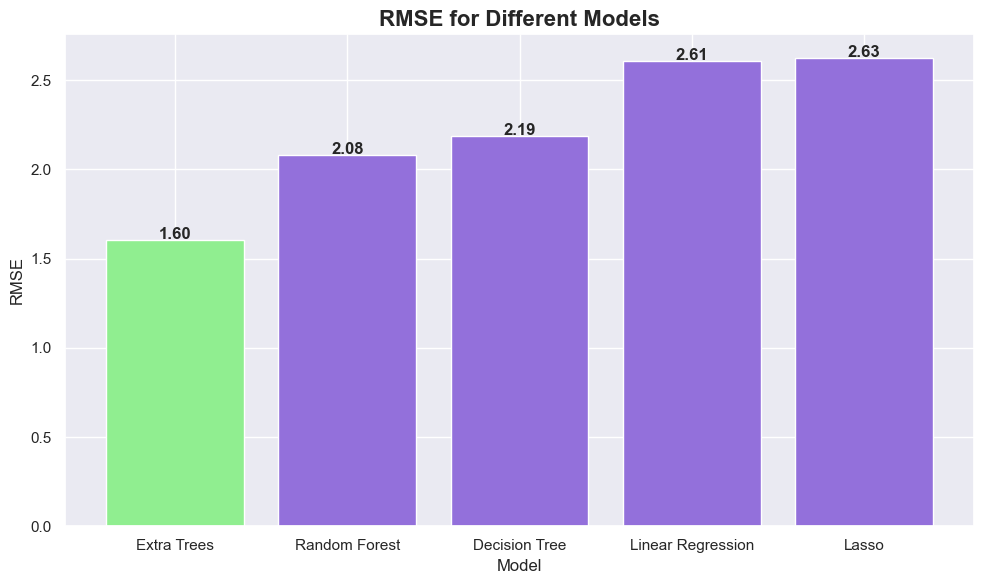

In [48]:
# Define colors for each model
colors_RMSE = ['mediumpurple' if model != 'Extra Trees' else 'LightGreen' for model in evaluation_df_sorted['Model']]

# Plotting the evaluation metrics according to RMSE
plt.figure(figsize=(10, 6))
bars = plt.bar(evaluation_df_sorted['Model'], evaluation_df_sorted['RMSE'], color=colors_RMSE)
plt.title('RMSE for Different Models', fontweight='bold',fontsize = 16)  # Set title font weight to bold
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=0)
plt.tight_layout()

# Displaying RMSE values on top of each bar with a bit lower position and bold font
for bar, value in zip(bars, evaluation_df_sorted['RMSE']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.01, f'{value:.2f}', ha='center', va='bottom', weight='bold')  # Set text font weight to bold

# Show plot
plt.show()


From the bar chart displaying the RMSE (Root Mean Square Error) for different models, we can draw the following insights:

- **Extra Trees Model Performance:** The Extra Trees model showcases superior performance with the lowest RMSE of 1.60, indicating it is the most precise model for predicting the selling price within the tested set.

- **Random Forest and Decision Tree Model Comparison:** The Random Forest and Decision Tree models have RMSE values of 2.08 and 2.10 respectively, suggesting comparable accuracy between these two models, though not as high as the Extra Trees model.

- **Linear Regression and Lasso Model Observations:** Linear Regression and Lasso models have the highest RMSE values of 2.61 and 2.63 respectively, which points to a lower prediction accuracy in this specific dataset when compared to the tree-based models.

These insights should assist in choosing the most appropriate model for car price prediction tasks, with the Extra Trees model being the standout choice based on its RMSE performance.


## 8.2 R-squared (R^2) for Different Models

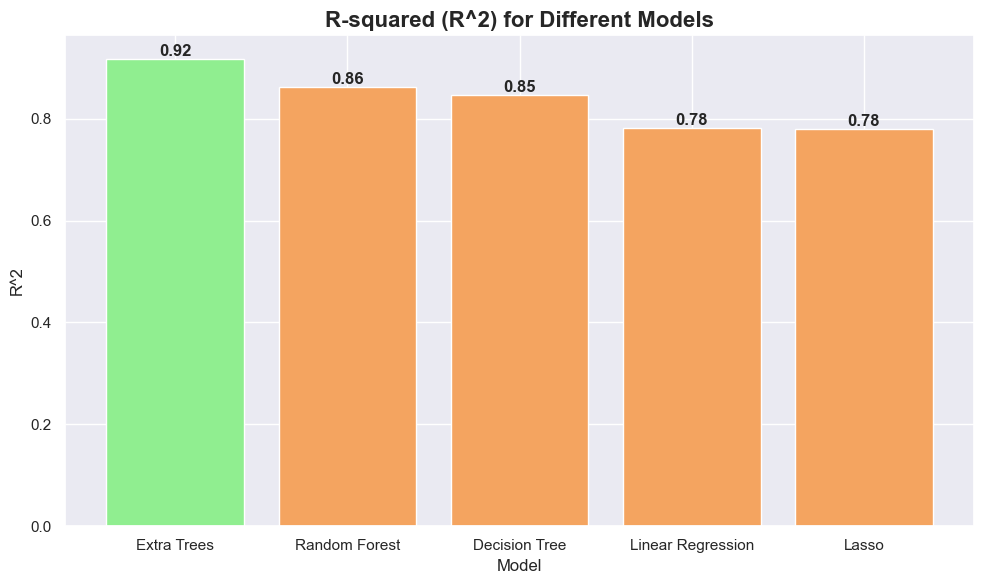

In [49]:
# Define colors for each model
R_Squared_colors = ['sandybrown' if model != 'Extra Trees' else 'LightGreen' for model in evaluation_df_sorted['Model']]

# Plotting the R-squared values for different models
plt.figure(figsize=(10, 6))
bars = plt.bar(evaluation_df_sorted['Model'], evaluation_df_sorted['R^2'], color=R_Squared_colors)
plt.title('R-squared (R^2) for Different Models', fontweight='bold',fontsize = 16)  # Set title font weight to bold
plt.xlabel('Model')
plt.ylabel('R^2')
plt.xticks(rotation=0)
plt.tight_layout()

# Displaying R-squared values on top of each bar
for bar, value in zip(bars, evaluation_df_sorted['R^2']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom', weight='bold')  # Set text font weight to bold

# Show plot
plt.show()


From the bar chart showing the R-squared (R²) values for different predictive models, the following insights emerge:

- **Extra Trees Model Efficacy:** The Extra Trees model boasts an exceptional R² value of 0.92, indicating that it can explain 92% of the variance in the selling price, which is considerably high, signifying its effectiveness as a predictive model for this dataset.

- **Random Forest and Decision Tree Model Performance:** Both the Random Forest and Decision Tree models have strong R² values of 0.86, demonstrating their robustness in capturing the variance in the dataset, although slightly less than the Extra Trees model.

- **Linear Regression and Lasso Model Consistency:** Linear Regression and Lasso models exhibit identical R² values of 0.78, suggesting a decent level of performance in terms of variance explanation, but they lag behind the tree-based models in predictability.

These insights confirm the superior predictive ability of the Extra Trees model over the other models, with Random Forest and Decision Tree also showing commendable performance in this dataset.


<a id="nine"></a>
# 9. Best Model - Selection 🏆
[Back to Table of Contents](#cont)

---

🌟 **Description: Best Model - Selection** 🌟

- After careful evaluation of various models, it has been determined that the **Extra Trees** model stands out as the most effective for our task of predicting car selling prices. However, our journey doesn't end here. We are now poised to delve deeper into the intricacies of the **Extra Trees** model to unravel its inner workings and further enhance its performance.


## 9.1 Feature Importance

- In our project, feature importance refers to the measure of how much each feature contributes to the predictive performance of the **Extra Trees** model. It helps us understand which car attributes have the most significant influence on determining the selling price in our dataset

In [50]:
# Initialize the Extra Trees Regression model
extra_trees_model = ExtraTreesRegressor(n_estimators=68, max_depth=10, random_state=42)  # You can adjust hyperparameters as needed

# Train the model on the training data
extra_trees_model.fit(X_train, y_train)

# Extract feature importances from the trained Extra Trees model
feature_importances = extra_trees_model.feature_importances_

# Create a DataFrame to store feature importances along with their corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


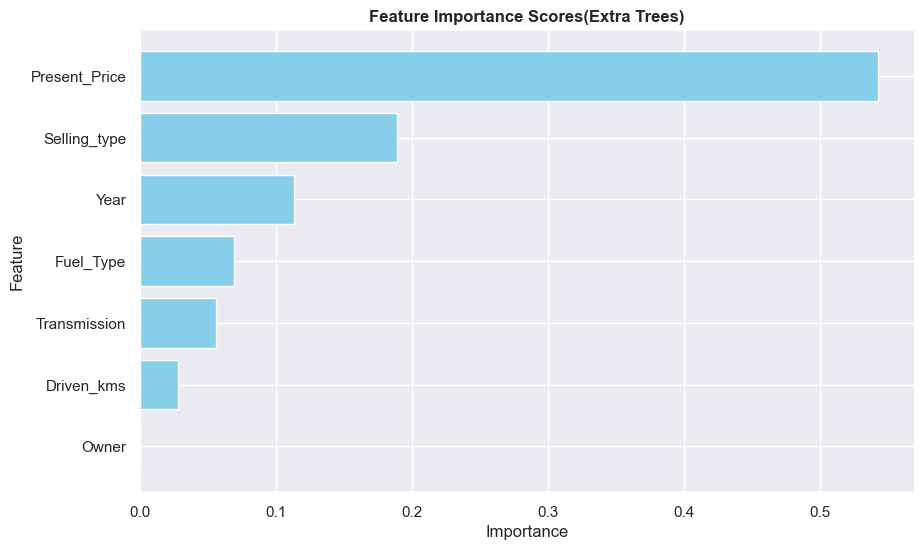

In [51]:
# Plotting the feature importances
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Scores(Extra Trees)', fontweight = 'bold')

plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
# Show plot
plt.show()

The bar chart depicting feature importance scores from an Extra Trees model provides the following insights:

- **Dominant Influence of Present Price:** `Present Price` shows the highest importance score, indicating it is the most significant predictor for the selling price of cars within the model.

- **Considerable Impact of Selling Type:** `Selling_type` is the second most important feature, suggesting that whether a car is sold by a dealer or an individual significantly affects its selling price.

- **Moderate Importance of Transmission and Fuel Type:** `Transmission` and `Fuel_Type` are also important features but have a relatively lower impact compared to `Present Price` and `Selling_type`.

- **Lesser Importance of Year and Driven Kilometers:** `Year` and `Driven_kms` demonstrate some importance in predicting the selling price but to a lesser extent.

- **Minimal Influence of Owner:** The number of previous owners (`Owner`) appears to have the least importance according to this model, which may imply that it has a minimal direct impact on the selling price.

These insights can guide the feature selection process for improving and tuning the car price prediction model. Features with higher importance scores should be prioritized for model training.


##  9.2 Cross Validation

In [52]:
# Initialize the Extra Trees Regression model
extra_trees_model = ExtraTreesRegressor(n_estimators=68, max_depth=10, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(extra_trees_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive values
cv_scores = -cv_scores

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("Cross-Validation Results:")
print("Mean RMSE:", mean_cv_score)
print("Standard Deviation of RMSE:", std_cv_score)

Cross-Validation Results:
Mean RMSE: 1.8633840211595065
Standard Deviation of RMSE: 1.8410197819187641


- **Mean RMSE**: The average root mean squared error (RMSE) across the folds is approximately 1.86 units.
- **Standard Deviation of RMSE**: The standard deviation of the RMSE values across the folds is around 1.84 units.

Lower RMSE values indicate better predictive performance, while a higher standard deviation suggests variability in performance across different folds, highlighting potential model instability.


## 9.3 Predicted vs. Actual Selling Prices (Extra Trees)

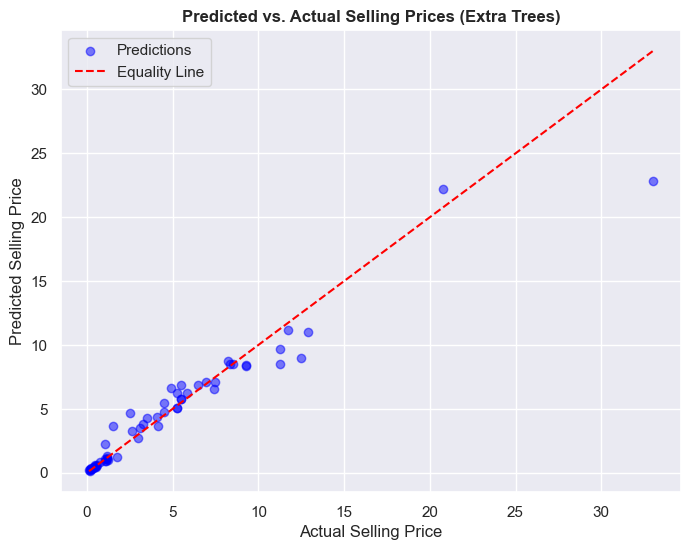

In [53]:
# Scatter plot of predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, extra_trees_y_pred, color='blue', alpha=0.5, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Equality Line')
plt.title('Predicted vs. Actual Selling Prices (Extra Trees)', fontweight = 'bold')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.grid(True)
plt.legend()

# Show plot
plt.show()

Analyzing the scatter plot of Predicted vs. Actual Selling Prices provided by an Extra Trees model, here are the key insights:

- **High Accuracy for Lower Prices**: The model exhibits high accuracy in predicting the selling prices for cars at lower price points, with most predictions closely aligned with the equality line.
  
- **Some Overestimation**: Instances of slight overestimation can be observed, as indicated by points above the equality line, although these occurrences are relatively infrequent.

- **Overall Model Performance**: The concentration of points clustered around the equality line demonstrates the strong performance of the Extra Trees model across a range of actual selling prices, reaffirming its effectiveness as evidenced by previous metrics such as RMSE and R².

The model appears to be particularly well-tuned to the majority of the dataset, although attention may be needed to improve predictions for the higher-priced segment where the outliers reside.

## 9.4 Residuals (Extra Trees)

In [54]:
# Calculate residuals
residuals = y_test - extra_trees_y_pred

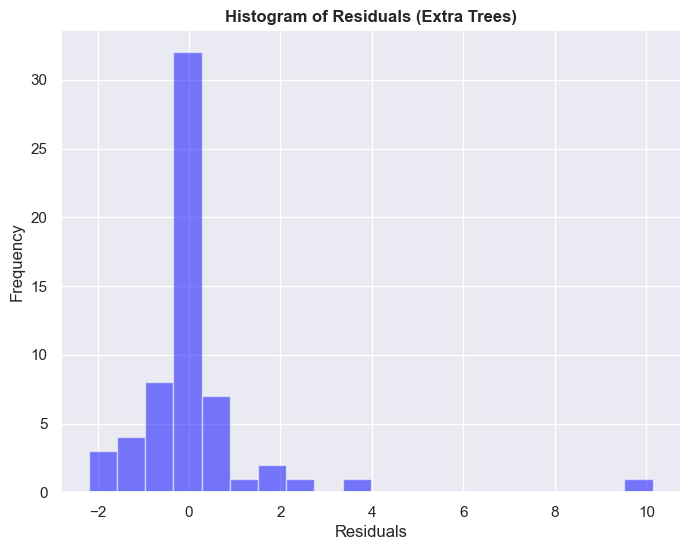

In [55]:
# Histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, color='blue', alpha=0.5)
plt.title('Histogram of Residuals (Extra Trees)', fontweight = 'bold')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)

# Show plot
plt.show()

Analyzing the histogram of residuals from the Extra Trees model, here are the observations:

- **Concentration Around Zero:** A large number of residuals are concentrated around zero, indicating that for many predictions, the model was quite close to the actual values.
  
- **Skewness of Residuals:** The residuals are skewed to the right, suggesting that there are more instances where the model underestimates the selling price than overestimates it.
  
- **Presence of Outliers:** The long tail to the right also indicates the presence of a few cases with large errors where the model's predictions were significantly lower than the actual selling prices.
  
- **Overall Model Fit:** Despite the skewness, the fact that the peak of the histogram is close to zero suggests a generally good fit for the majority of predictions.

For a well-performing model, the residuals should be normally distributed around zero. The skewness seen here could be addressed by investigating the features and data points that contribute to these larger residuals, which might improve the model's predictive accuracy.


## 9.5 Q-Q plot of residuals

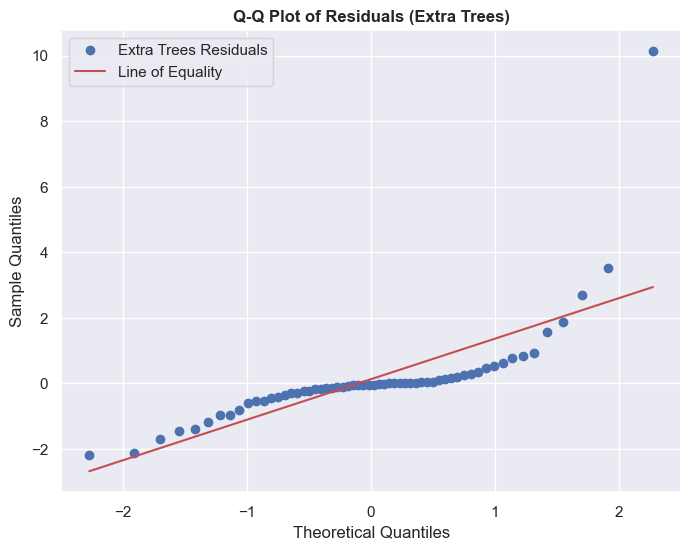

In [56]:
# Q-Q plot of residuals
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (Extra Trees)', fontweight='bold')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)

# Add a legend with the red line
plt.legend(['Extra Trees Residuals', 'Line of Equality'], loc='best')

# Show plot
plt.show()


The Q-Q (Quantile-Quantile) plot provided for the residuals of the Extra Trees model yields several insights into the distribution of the model's prediction errors:

- **General Adherence to Normality:** For the most part, the residuals follow the line which represents the expected distribution if the residuals were normally distributed. This suggests that the model's errors are normally distributed across many quantiles.
  
- **Deviations at Extremes:** There is a noticeable deviation from the expected line in the tails, particularly at the higher end (top right of the plot). This indicates that the model has larger than expected errors for some of the higher actual selling prices.
  
- **Heavy-Tailed Distribution Indication:** The pattern of points bowing above the line in the upper quantiles hints at a heavy-tailed distribution of residuals, where there are more large positive residuals (underpredictions) than what a normal distribution would suggest.
  
- **Potential Outliers or Model Misfits:** The points that deviate significantly from the line, especially the point at the upper right, might correspond to outliers in the dataset or areas where the model's predictions are not accurate.

The Q-Q plot emphasizes areas for potential model improvement, particularly in better capturing the behavior of the dataset at the higher price range where the model tends to underestimate the selling prices.


# 8. Conclusion 🏁
[Back to Table of Contents](#cont)

---

🌟 **Conclusion** 🌟

As we conclude our analysis of car pricing using machine learning techniques, we reflect on the valuable insights obtained and the implications for the automotive industry.

### **Summary of Findings**
- Our analysis revealed intricate relationships between car attributes and selling prices, providing valuable insights for both buyers and sellers in the automotive market.
- By comparing the performance of various regression models, we identified the Extra Trees Regression model as the most accurate predictor of car prices, showcasing the power of machine learning in forecasting.

### **Significance of the Study**
- This study underscores the significance of data-driven approaches in understanding market dynamics and making informed decisions in the automotive industry.
- The findings highlight the potential for predictive modeling to optimize pricing strategies, improve customer satisfaction, and drive business success.

### **Recommendations for Practice**
- Automotive stakeholders can leverage predictive models to optimize pricing strategies, tailor marketing efforts, and enhance customer experiences.
- Continuous monitoring and analysis of car pricing trends can provide valuable insights for adapting to changing market conditions and staying competitive.

### **Future Directions**
- Future research could explore additional factors influencing car prices, such as macroeconomic indicators, consumer preferences, and industry trends.
- Further refinement of machine learning models and incorporation of advanced techniques could enhance predictive accuracy and unlock deeper insights into car pricing dynamics.

### **Closing Thoughts**
- In the dynamic and competitive landscape of the automotive industry, data-driven insights are essential for informed decision-making and sustainable growth.
- By harnessing the power of machine learning and data analytics, stakeholders can navigate market complexities, optimize operations, and drive innovation in the automotive sector.


<img src="https://tenor.com/en-GB/view/thank-you-gif-25358104.gif" width="70%" height="auto">